# Análisis Exploratorio de Datos (EDA) - Propinas

El objetivo de este análisis es descubrir cuales son las causas de mayores/menores propinas en un restaurante, analizando variables como el sexo, cantidad de personas por mesa, día de la semana, hora, valor total de la cuenta y si los clientes son fumadores o no

## Importación de Paquetes

Los paquetes utilizados en este análisis son: Pandas, Numpy, Seaborn y Matplotlib

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
datos = pd.read_csv('tips.csv')
datos['sex'] = datos['sex'].replace({'Male':'Hombre', 'Female':'Mujer'})
datos['time'] = datos['time'].replace({'Dinner':'Cena', 'Lunch':'Almuerzo'})
datos['day'] = datos['day'].replace({'Sun':'Dom', 'Sat':'Sab','Fri':'Vie','Thur':'Jue'})
datos.head()
datos.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Agrupaciones
Con el fin de encontrar relaciones entre las variables dadas, vamos a calcular la correlaciones y medias entre las variables numéricas. Por el momento, con la tabla estadística podemos ver que la desviación estandar entre las variables es casi nulo, exceptuando el de la cuenta total, sin embargo es de esperarse, ya que entre más personas, la cuenta aumenta y así mismo la propina tiende a aumentar.

In [155]:
grupo_sexo= datos.groupby('sex')['tip'].mean()
grupo_sexo


sex
Hombre    3.089618
Mujer     2.833448
Name: tip, dtype: float64

In [156]:
grupo_fumador= datos.groupby('smoker')['tip'].mean()
grupo_fumador

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [157]:
cor1 = datos['total_bill'].corr(datos['tip'])
print(cor1)

0.6757341092113645


Con esto datos podemos definir que los hombres al tener una media de propinas más alta, tiende a dejar más propina respecto a las mujeres, por el otro lado, no hay una diferencia relevante (respecto a las propinas) entre los fumadores y no fumadores, por lo que este dato no se tendrá en cuenta en el análisis gráfico y estadístico. Con la correlación de Pearson, sabemos que hay una correlación entre el valor de la cuenta y el valor de la propina, por lo que se explorará con más detalle juntando las otras variables.

Text(0.5, 0.98, 'Relación variables respecto a las propinas')

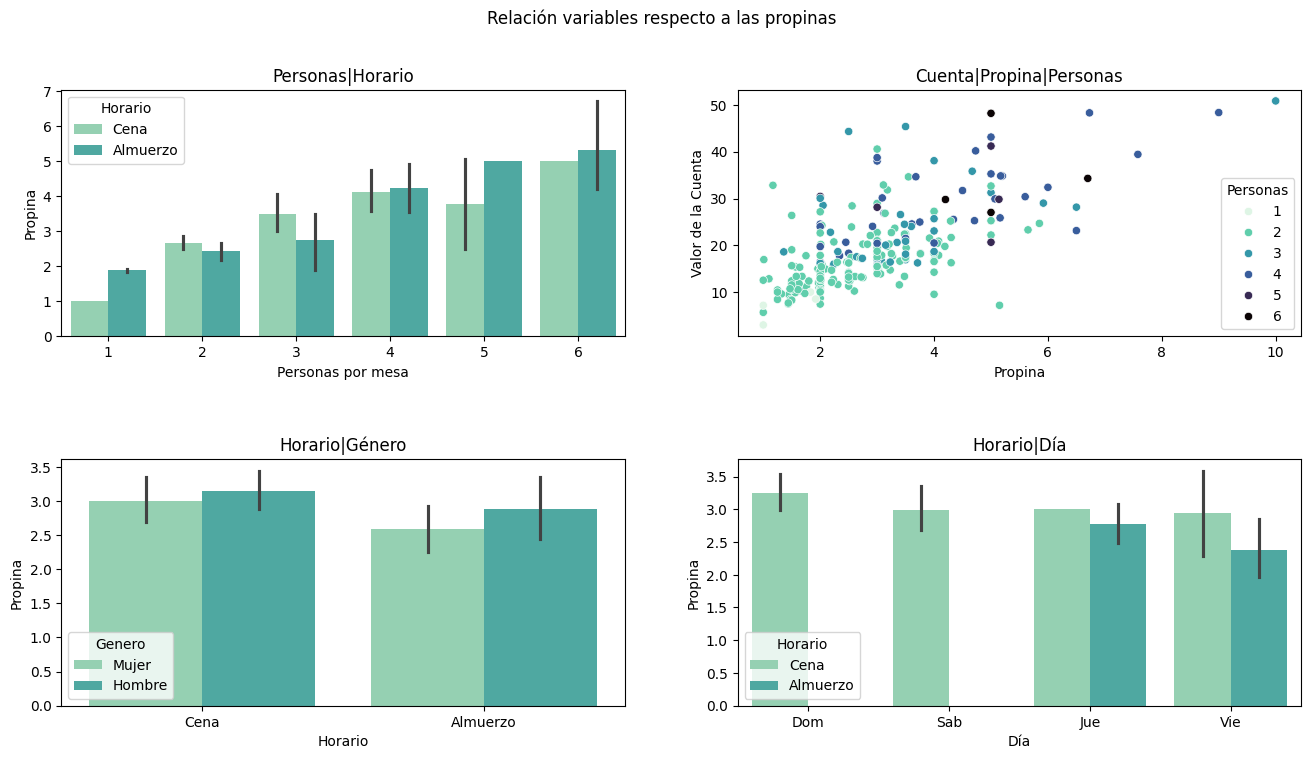

In [158]:
sns.set_palette('mako_r')
fig, ax = plt.subplots(2,2, figsize=(16,8))
plt.subplots_adjust( hspace=0.5) 

sns.barplot(data=datos, x='size', y='tip', ax=ax[0,0], hue='time')
ax[0,0].legend(title='Horario')
ax[0,0].set_ylabel('Propina')
ax[0,0].set_xlabel('Personas por mesa')
ax[0,0].set_title('Personas|Horario')

sns.scatterplot(data=datos, x='tip', y='total_bill', ax=ax[0,1], hue='size', palette='mako_r')
ax[0,1].set_title('Cuenta|Propina|Personas')
ax[0,1].set_ylabel('Valor de la Cuenta')
ax[0,1].legend(title='Personas')
ax[0,1].set_xlabel('Propina')

sns.barplot(data=datos, x='time', y='tip', hue='sex', ax=ax[1,0])
ax[1,0].legend(title='Genero')
ax[1,0].set_ylabel('Propina')
ax[1,0].set_xlabel('Horario')
ax[1,0].set_title('Horario|Género')

sns.barplot(data=datos, x='day', y='tip', hue='time', ax=ax[1,1])
ax[1,1].legend(title='Horario')
ax[1,1].set_ylabel('Propina')
ax[1,1].set_xlabel('Día')
ax[1,1].set_title('Horario|Día')

plt.suptitle('Relación variables respecto a las propinas')


## Conclusiones

Con los gráficos y las estadísticas previas podemos obtener las conclusiones y las relaciones entre las variables resecto a las propinas:

1. Los hombres tienden a dar más propina, sin embargo, no con una diferencia grande.
2. El horario es un diferencial entre las propinas, siendo el horario de la **cena** el más provechoso con las propinas
3. El día así mismo hace diferencia, teniendo en cuenta que el restaurante no abre los sabados y domingos a la hora de almuerzo, como se puede suponer, los **sabados y domingos** son los días con más propina.
4. Como era de esperarse, hay una relación proporcional entre la cantidad de personas por mesa y la propina (a mayor cantidad de personas, mayor es la propina)

Teniendo en cuenta las observaciones, gráficos y estadísticas previas, podemos decir que lso días más rentables para las propinas son los **domingos**, en una mesa de **5 o 6** personas.